In [1]:
!pip install scikit-fuzzy --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.3 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [4]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [8]:
X = base.iloc[:,[1,25]].values

In [9]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [12]:
X.shape

(30000, 2)

In [13]:
X.T.shape

(2, 30000)

In [14]:
import skfuzzy

In [15]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [16]:
r

(array([[-0.73894036, -0.30170916],
        [ 0.7499908 ,  2.01662188],
        [ 0.97505042, -0.42055423]]),
 array([[0.91181157, 0.84858042, 0.97912784, ..., 0.95010594, 0.95613034,
         0.97292982],
        [0.02591909, 0.02732206, 0.0049919 , ..., 0.01491392, 0.01405598,
         0.00905886],
        [0.06226934, 0.12409752, 0.01588026, ..., 0.03498015, 0.02981368,
         0.01801133]]),
 array([[0.1185164 , 0.58477178, 0.37512659, ..., 0.80195478, 0.46195077,
         0.35616033],
        [0.35667936, 0.24483029, 0.16524266, ..., 0.0283004 , 0.51799815,
         0.40501512],
        [0.52480424, 0.17039793, 0.45963076, ..., 0.16974482, 0.02005108,
         0.23882455]]),
 array([[0.55635995, 0.52134925, 0.2002518 , ..., 0.39092974, 0.30019211,
         0.25949714],
        [3.29988281, 2.90548421, 2.80455075, ..., 3.12024623, 2.47586676,
         2.68928394],
        [2.12897847, 1.36330712, 1.57241546, ..., 2.03738877, 1.70000425,
         1.9072186 ]]),
 array([25732.607987

In [17]:
previsoes_porcentagem = r[1]

In [18]:
previsoes_porcentagem.shape

(3, 30000)

In [20]:
previsoes_porcentagem

array([[0.91181157, 0.84858042, 0.97912784, ..., 0.95010594, 0.95613034,
        0.97292982],
       [0.02591909, 0.02732206, 0.0049919 , ..., 0.01491392, 0.01405598,
        0.00905886],
       [0.06226934, 0.12409752, 0.01588026, ..., 0.03498015, 0.02981368,
        0.01801133]])

In [21]:
previsoes_porcentagem[0][0]

0.9118115654524055

In [22]:
previsoes_porcentagem[1][0]

0.02591909209598027

In [23]:
previsoes_porcentagem[2][0]

0.062269342451614224

In [24]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [25]:
previsoes = previsoes_porcentagem.argmax(axis = 0)

In [26]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
previsoes[5000]

0

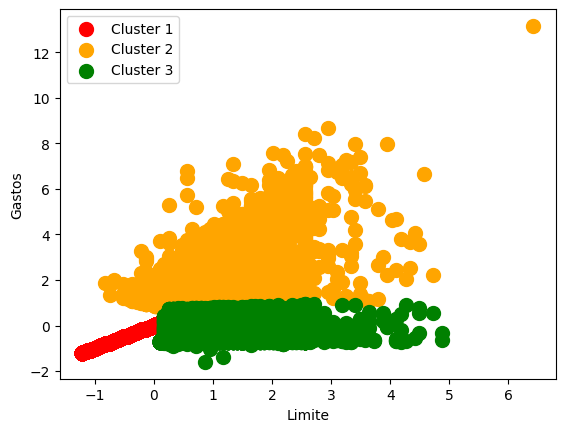

In [30]:
plt.scatter(X[previsoes==0,0], X[previsoes==0,0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes==1,0], X[previsoes==1,1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes==2,0], X[previsoes==2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()